In [18]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [17]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print(df.shape)
print(df.columns)
df.head()

(506, 14)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
class MultiOutputRegressor:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.models = []

    def train(self):
        # Split data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.X, self.Y, test_size=0.3, random_state=42)

        # Train a separate model for each target variable
        for i in range(self.Y.shape[1]):
            model = GridSearchCV(RandomForestRegressor(random_state=42), {
                'n_estimators': [50, 100],
                'max_depth': [None, 5, 10]
            }, cv=3)
            model.fit(self.X_train, self.Y_train[:, i])
            self.models.append(model)

    def evaluate(self):
        for i, model in enumerate(self.models):
            preds = model.predict(self.X_test)
            r2 = r2_score(self.Y_test[:, i], preds)
            n = len(self.Y_test)
            p = 1  # one feature
            adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
            print(f"Adjusted R² for output {i+1}: {adj_r2:.4f}")

    def visualize(self):
        for i, model in enumerate(self.models):
            preds = model.predict(self.X_test)
            plt.scatter(self.Y_test[:, i], preds)
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.title(f"Target {i+1}")
            plt.plot([min(preds), max(preds)], [min(preds), max(preds)], 'r--')
            plt.show()


Adjusted R² for output 1: 0.3880
Adjusted R² for output 2: 0.5035
Adjusted R² for output 3: -0.0959
Adjusted R² for output 4: 0.6406


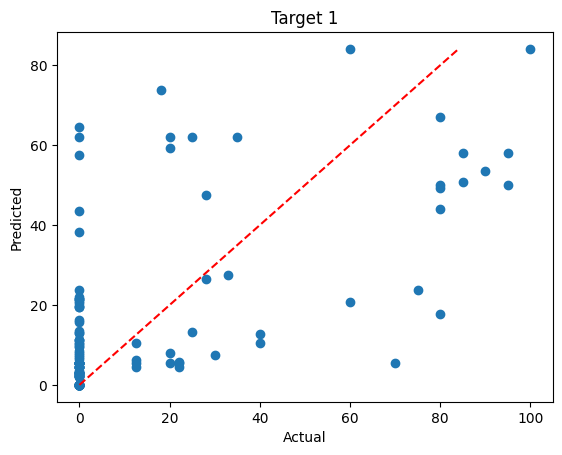

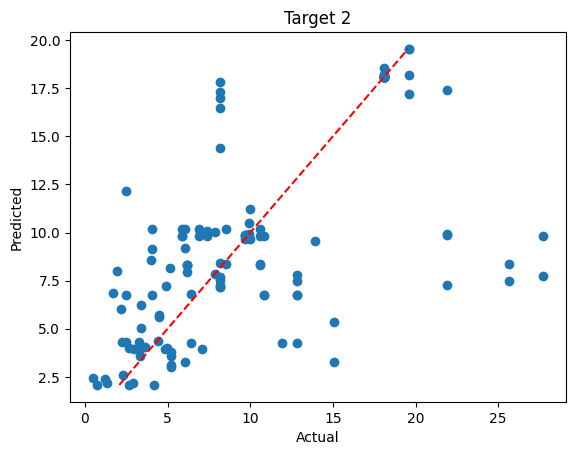

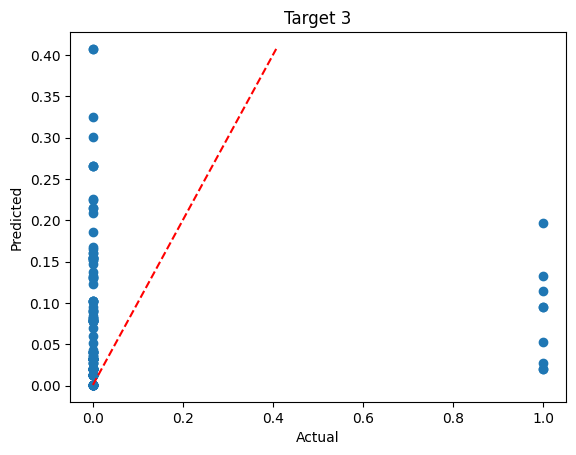

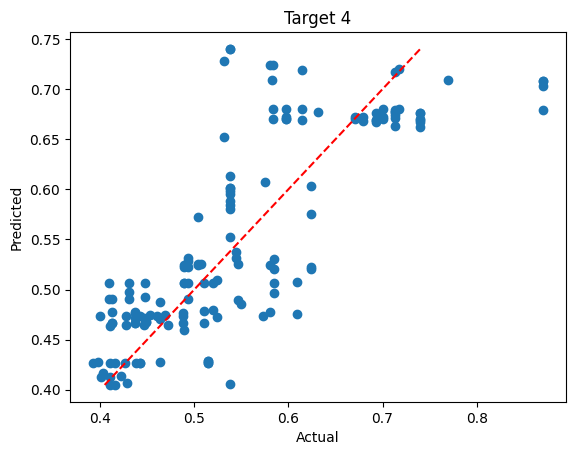

In [20]:
# Input (independent variable)
X = df[['crim']].values

# Output (targets: columns 2 to 5)
Y = df.iloc[:, 1:5].values

# Create and use the model
reg = MultiOutputRegressor(X, Y)
reg.train()
reg.evaluate()
reg.visualize()
